# Config

In [2]:
using YAML
# import Functions from configmanager 
include("ConfigManager.jl")


Main.ConfigManager

In [92]:
ConfigManager.initialise_config("my-simulation", verbose=1)

Folder C:\Github\reproducible-scientific-notebook-configurations\project-data\my-simulation already exists. No changes made.


In [93]:
config = ConfigManager.load_configs("my-simulation", "v1")
ConfigManager.print_config(config)

notebook: 
  name: my-simulation
  version: v1
  desc: Simulate and capture the results of ODE models in SBML format
exp: 
  model: lotka-volterra.xml
  simulation: 
    stop: 1000
    step: 100
    start: 0


# Run

In [ ]:
notebook_config = config["notebook"]

In [83]:
using SBMLImporter
prn, cb = load_SBML(model_path)

(ReactionNetworkImporters.ParsedReactionNetwork(Model SBML_model:
Unknowns (2): see unknowns(SBML_model)
  prey(t)
  predator(t)
Parameters (4): see parameters(SBML_model)
  beta
  alpha
  gamma_
  default_compartment, Pair{Num, Float64}[prey(t) => 10.0, predator(t) => 5.0], Pair{Num, Float64}[beta => 0.4, alpha => 1.1, gamma_ => 0.4, default_compartment => 1.0], nothing, nothing), CallbackSet{Tuple{}, Tuple{}}((), ()))

In [84]:
using ModelingToolkit
sys = structural_simplify(convert(ODESystem, prn.rn))

Model SBML_model:
Equations (2):
  2 standard: see equations(SBML_model)
Unknowns (2): see unknowns(SBML_model)
  predator(t)
  prey(t)
Parameters (4): see parameters(SBML_model)
  gamma_
  default_compartment
  beta
  alpha

In [85]:
import DifferentialEquations as DE
start = sim_params["start"]
stop = sim_params["stop"]
saveat_val = stop/sim_params["step"]
tspan = (start, stop)

# odesys_simp = structural_simplify(odesys)
prob = DE.ODEProblem(sys, prn.u0, tspan, prn.p)
sol = DE.solve(prob, saveat=saveat_val)


retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
    0.0
   10.0
   20.0
   30.0
   40.0
   50.0
   60.0
   70.0
   80.0
   90.0
  100.0
  110.0
  120.0
    ⋮
  890.0
  900.0
  910.0
  920.0
  930.0
  940.0
  950.0
  960.0
  970.0
  980.0
  990.0
 1000.0
u: 101-element Vector{Vector{Float64}}:
 [5.0, 10.0]
 [0.3862083722170896, 0.0051730751355180595]
 [8.543780488066819, 0.003564151658366201]
 [0.15969311157773292, 0.04816187282314854]
 [3.4944837907959703, 0.00026408422965260367]
 [0.07757372593388287, 0.506725954981716]
 [1.4324044223157941, 0.00039266096237330195]
 [0.20849946590538035, 5.442973344314037]
 [0.5869464846446414, 0.0019360072199097942]
 [13.017958762661548, 0.1062997294419259]
 [0.2429811451809917, 0.015650894592038625]
 [5.433597783050646, 0.0005359013618100756]
 [0.10565685623419513, 0.15376132732663494]
 ⋮
 [0.13010056964927455, 0.06865981716256347]
 [3.0841531411738363, 0.0002048611334834397]
 [0.07052613914796556, 0.5878918946890432

In [86]:
# convert sol to DataFrame
using DataFrames
df = DataFrame(sol)
ConfigManager.save_data(notebook_config, df, "simulation_results_julia", data_format="csv", verbose=1)

Data saved at C:\Github\reproducible-scientific-notebook-configurations\project-data\my-simulation\data\v1_simulation_results_julia.csv


In [87]:
import Plots
fig = Plots.plot(sol) # Plots the solution
ConfigManager.save_figure(notebook_config, fig, "simulation_plot_julia", fig_format="png", verbose=1)

Figure saved at C:\Github\reproducible-scientific-notebook-configurations\project-data\my-simulation\figures\v1_simulation_plot_julia.png


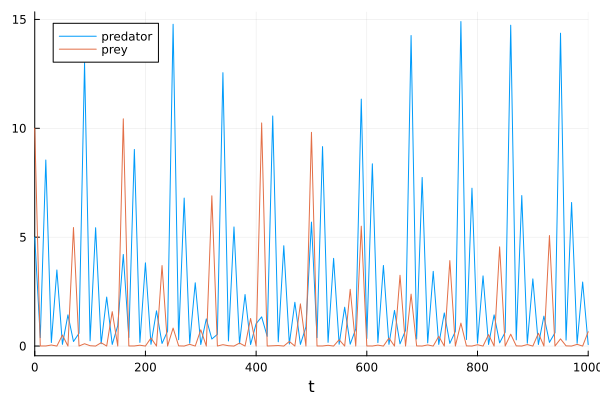

In [88]:
# To quickly visualize the solution without saving
Plots.plot(sol) 